### Check run with bottom Drag (linear) and bottom friction (no_slip=True)

In [1]:
import cmocean as cmo
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
from matplotlib.gridspec import GridSpecFromSubplotSpec
from matplotlib.lines import Line2D
%matplotlib inline
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from xmitgcm import open_mdsdataset

In [2]:
outdir2 = '/data/SO2/sio-kramosmusalem/exp06_512x612x100_ORL/12_noSVB_febTS_bottDrag/'
outdir = '/data/SO2/sio-kramosmusalem/exp06_512x612x100_ORL_SVB/12_SVB_febTS_bottDrag/'
#iters = np.arange(10,7210,10)
levels = [1,   2,  3,  4,  5,  6,  7,  8,  9, 10, 
          11, 12, 13, 14, 15, 16, 17,
          18, 19, 20, 21, 22, 23, 24, 25,
          26, 27, 28, 29, 30, 31,
          32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
          45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,              
          58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 
          74, 79, 84, 89, 94, 99,]
ds = open_mdsdataset(outdir, prefix=['eta','dynVars'], levels=levels)
ds2 = open_mdsdataset(outdir2, prefix=['eta','dynVars'], levels=levels)

In [3]:
nx = 512
ny = 612
nz = 100

In [4]:
depth = ds2.Depth[:]
LAT = ds2['YC'][:]
LON = ds2['XC'][:]-360
lat = ds2.YC[:,0].data
lon = ds2.XC[0,:].data-360

Z = ds2['Z'][:]
Zl = ds2['Zl'][:]

# No bay centers mask
hFacC = ds2['hFacC'][:]
hfac = np.ma.masked_values(hFacC, 0)
mask = np.ma.getmask(hfac)
dep_masked = np.ma.masked_values(depth,0)
mask_dep = np.ma.getmask(dep_masked)

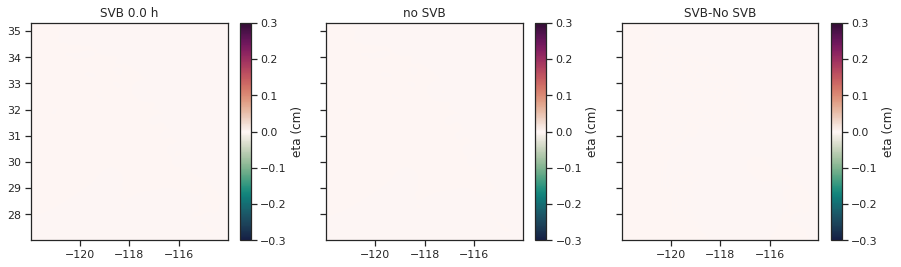

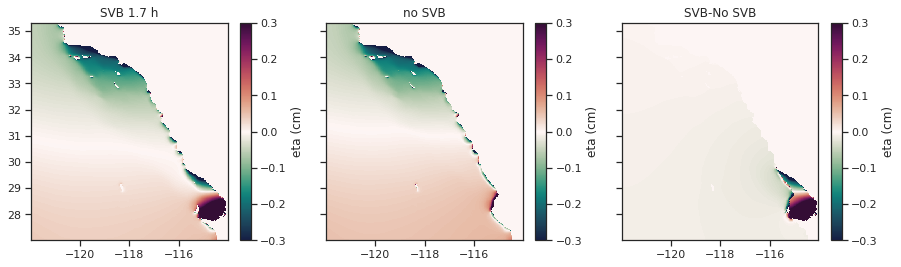

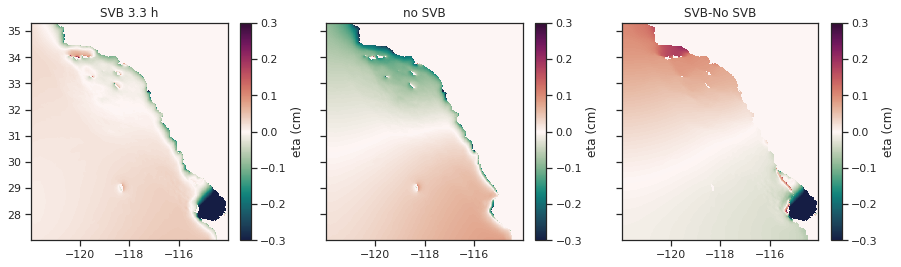

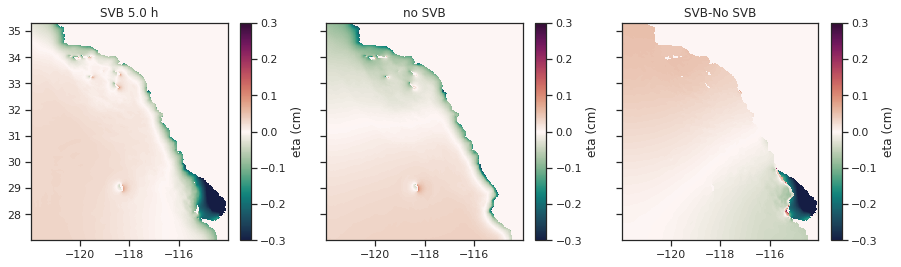

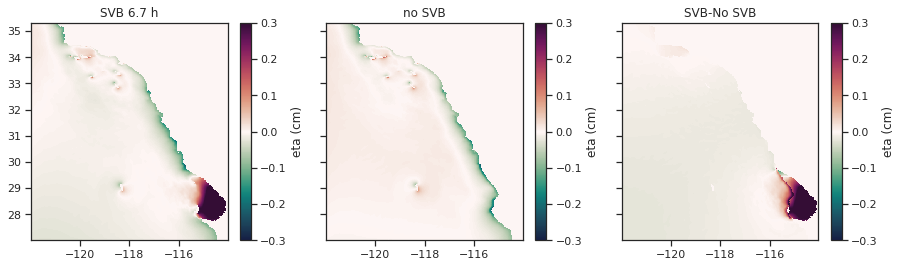

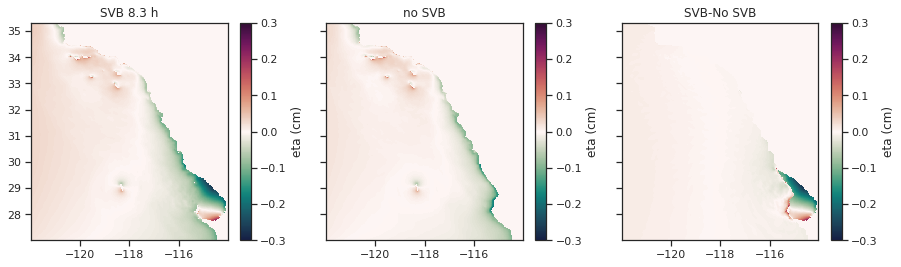

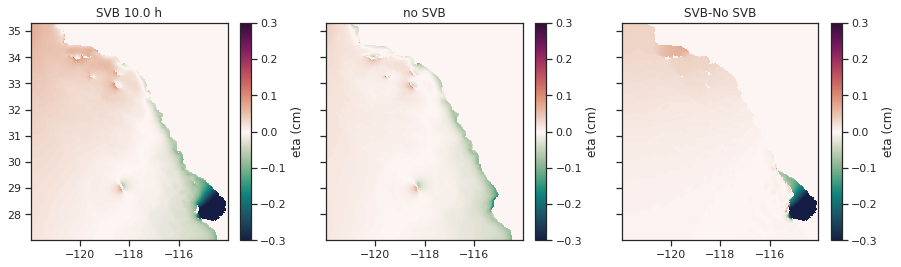

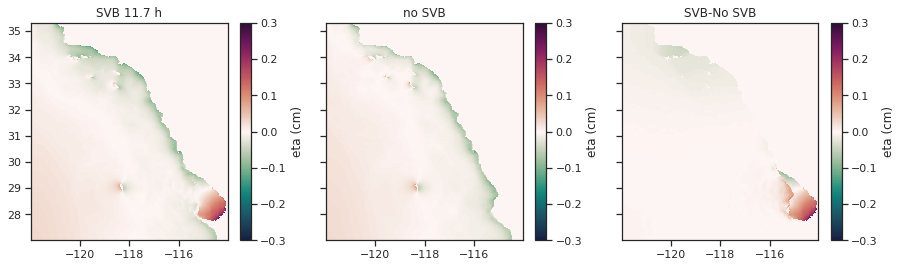

IndexError: Index is not smaller than dimension 80 >= 72

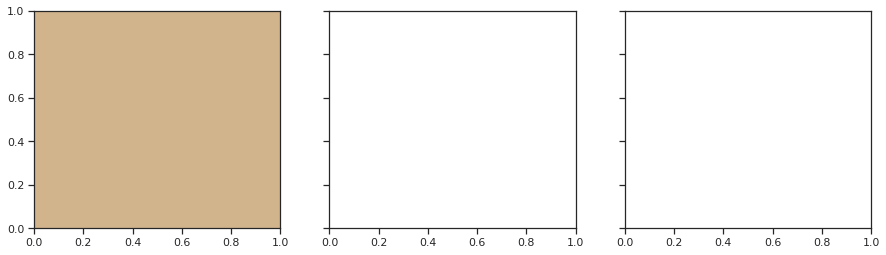

In [5]:
for ii in range(0,144,10):
    sns.set_style('ticks')
    sns.set_context('notebook')
    fig, (ax,ax1,ax2) = plt.subplots(1,3,figsize=(15,4), sharey=True)
    ax.set_facecolor('tan')
    pc = ax.pcolormesh(lon,lat,ds['ETAN'][ii,:,:]*100,
                      vmin=-0.30,vmax=0.30,cmap=cmo.cm.curl)
    cb = plt.colorbar(pc,ax=ax,label='eta (cm)')
    ax.set_title('SVB %1.1f h' %(ii*600/3600))
    pc = ax1.pcolormesh(lon,lat,ds2['ETAN'][ii,:,:]*100,
                      vmin=-0.30,vmax=0.30,cmap=cmo.cm.curl)
    cb = plt.colorbar(pc,ax=ax1,label='eta (cm)')
    ax1.set_title('no SVB')
    pc = ax2.pcolormesh(lon,lat,(ds['ETAN'][ii,:,:]-ds2['ETAN'][ii,:,:])*100,
                      vmin=-0.30,vmax=0.30,cmap=cmo.cm.curl)
    cb = plt.colorbar(pc,ax=ax2,label='eta (cm)')
    ax2.set_title('SVB-No SVB')
    plt.show()

In [8]:
ds.iter

<xarray.DataArray 'iter' (time: 72)>
dask.array<concatenate, shape=(72,), dtype=int64, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
    iter     (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
  * time     (time) timedelta64[ns] 00:00:20 00:00:40 ... 00:23:40 00:24:00

<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kw)>

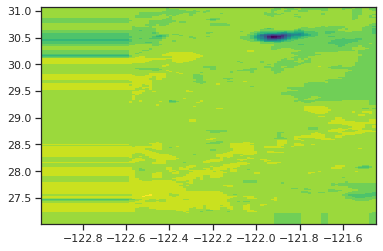

In [7]:
plt.pcolormesh(lon[:100],lat[:300],ds.Depth[:300,:100].data, cmap='viridis')
plt.colorbar

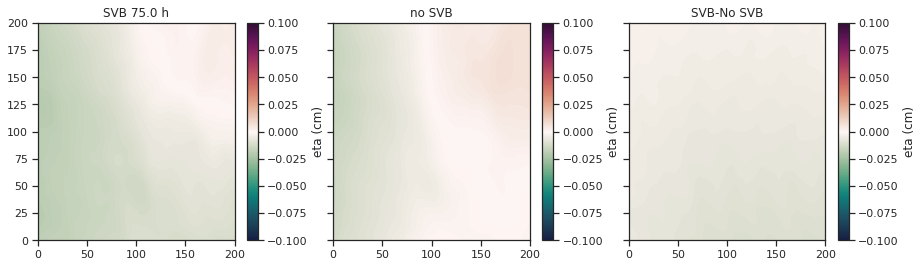

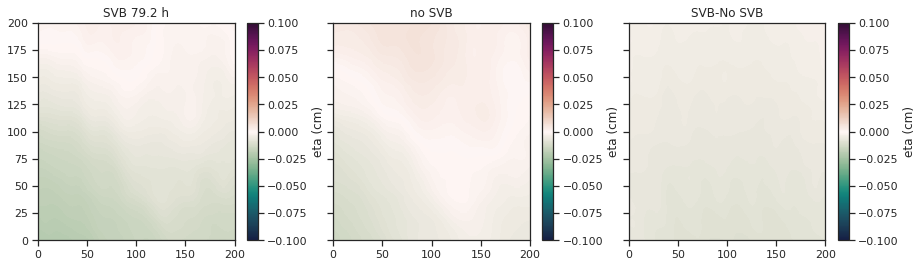

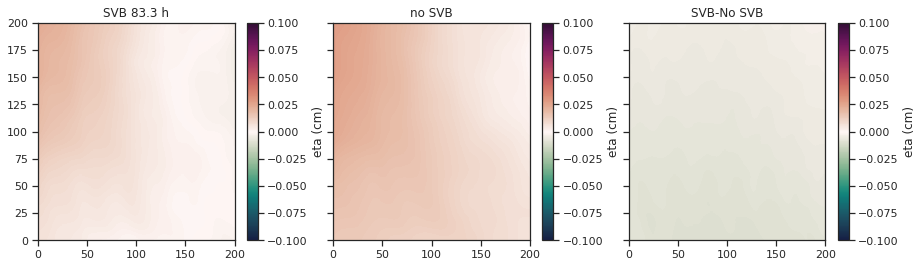

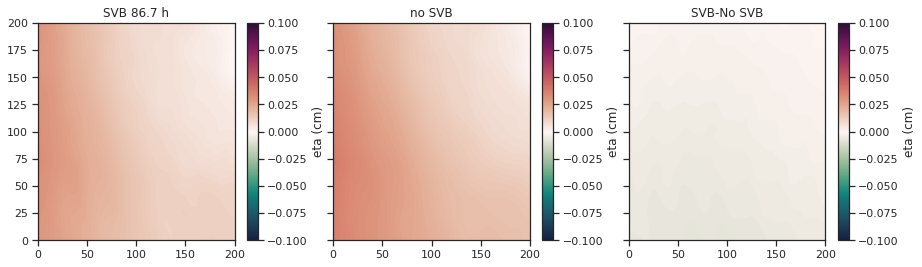

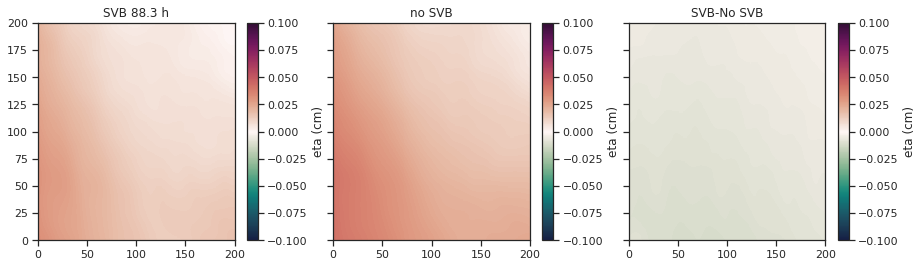

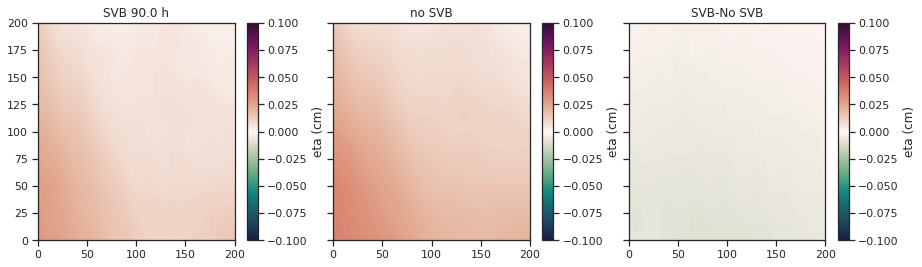

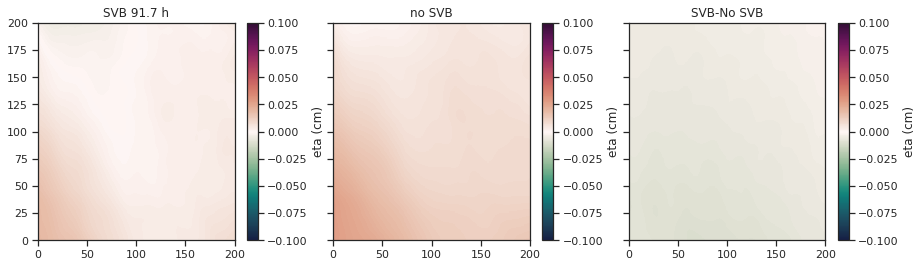

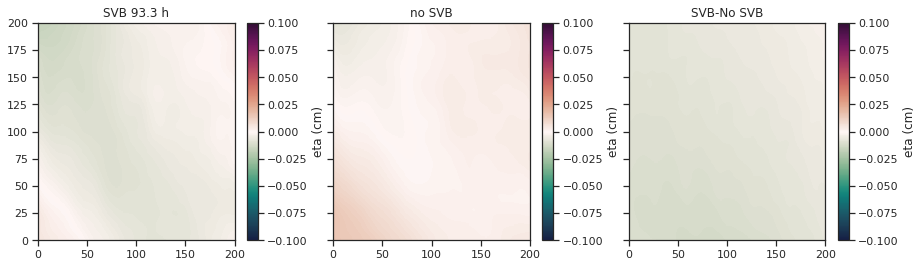

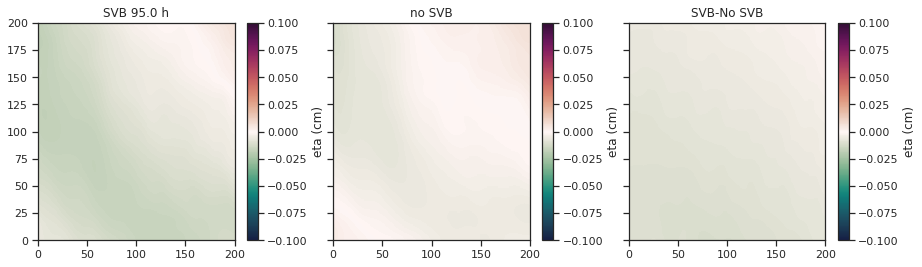

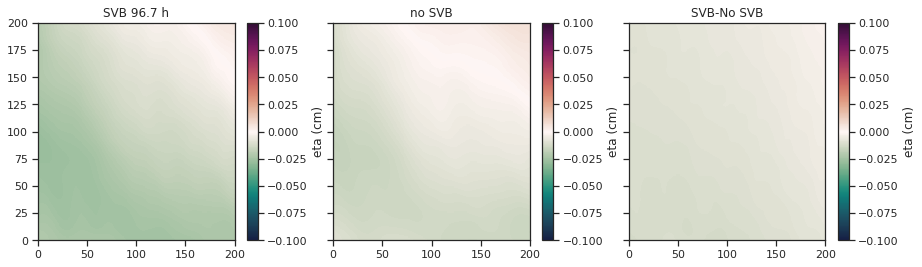

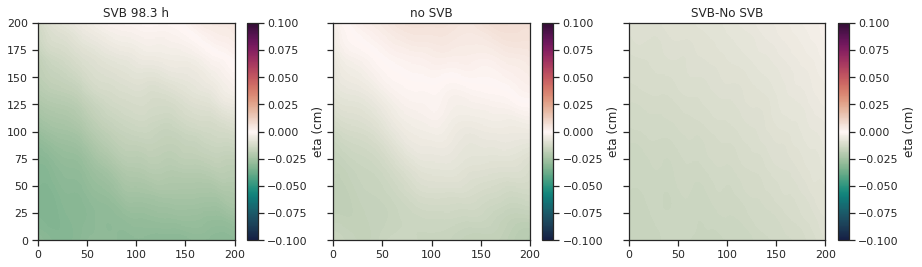

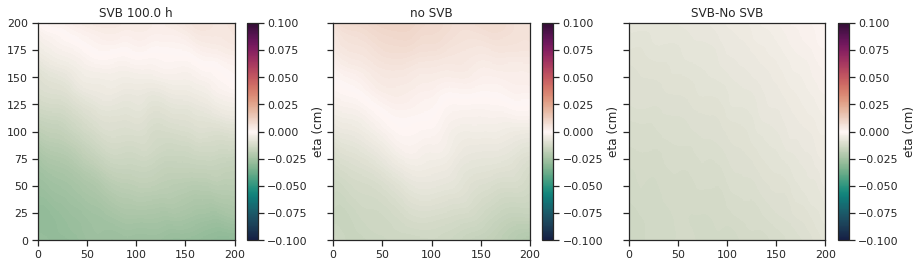

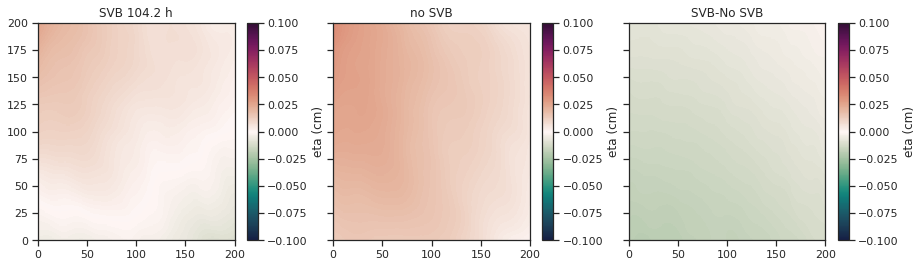

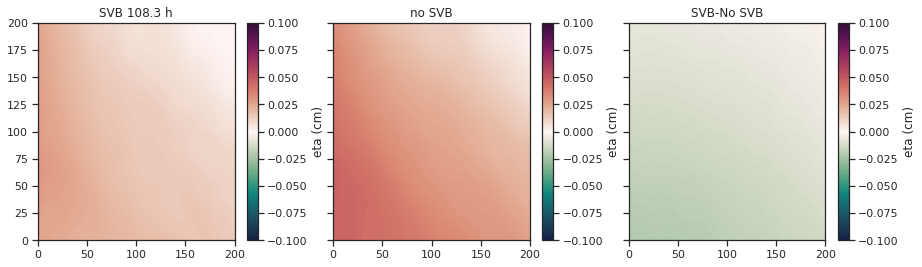

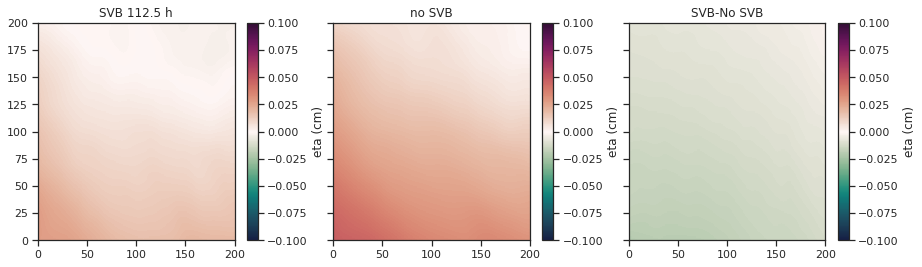

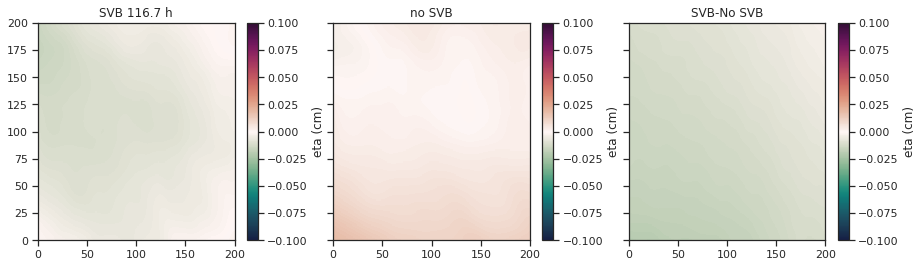

In [8]:
for ii in [450,475,500,520,530,540,550,560,570,580,590,600,625,650,675,700]:
    sns.set_style('ticks')
    sns.set_context('notebook')
    fig, (ax,ax1,ax2) = plt.subplots(1,3,figsize=(15,4), sharey=True)
    ax.set_facecolor('tan')
    pc = ax.pcolormesh(ds['ETAN'][ii,:200,:200]*100,
                      vmin=-0.1,vmax=0.1,cmap=cmo.cm.curl)
    cb = plt.colorbar(pc,ax=ax,label='eta (cm)')
    ax.set_title('SVB %1.1f h' %(ii*600/3600))
    pc = ax1.pcolormesh(ds2['ETAN'][ii,:200,:200]*100,
                      vmin=-0.1,vmax=0.1,cmap=cmo.cm.curl)
    cb = plt.colorbar(pc,ax=ax1,label='eta (cm)')
    ax1.set_title('no SVB')
    pc = ax2.pcolormesh((ds['ETAN'][ii,:200,:200]-ds2['ETAN'][ii,:200,:200])*100,
                      vmin=-0.1,vmax=0.1,cmap=cmo.cm.curl)
    cb = plt.colorbar(pc,ax=ax2,label='eta (cm)')
    ax2.set_title('SVB-No SVB')
    plt.show()

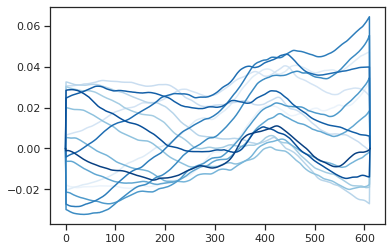

In [9]:
sns.set_palette('Blues',16)
for ii in [450,475,500,520,530,540,550,560,570,580,590,600,625,650,675,700]:
    plt.plot(ds['ETAN'][ii,:,1]*100)
    

In [10]:
116/24

4.833333333333333

In [11]:
np.sqrt(40000)

200.0

In [12]:
(1E6/200)/3600

1.3888888888888888

In [13]:
93.3/24

3.8874999999999997

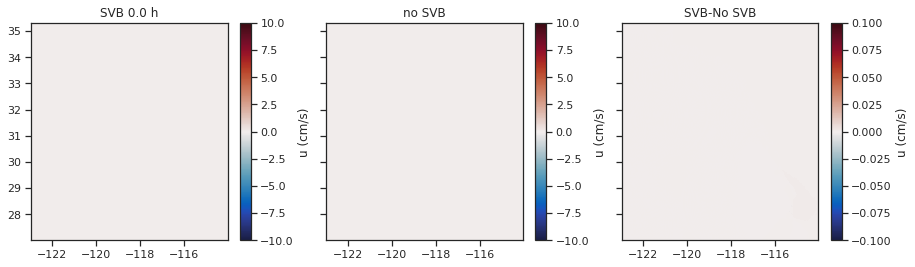

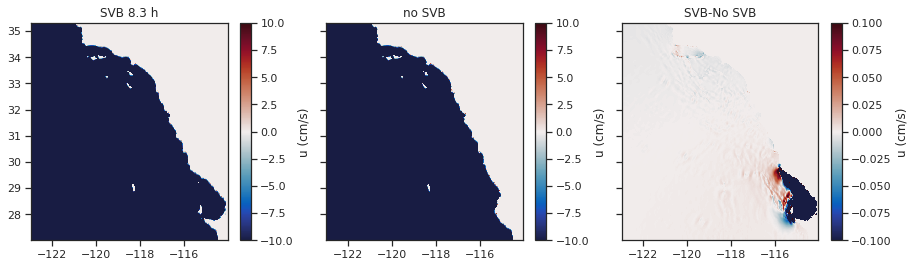

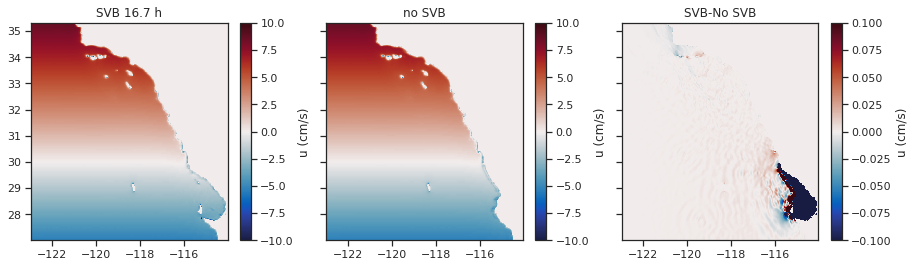

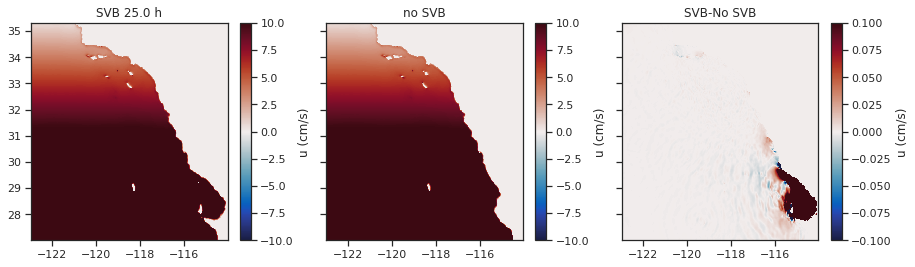

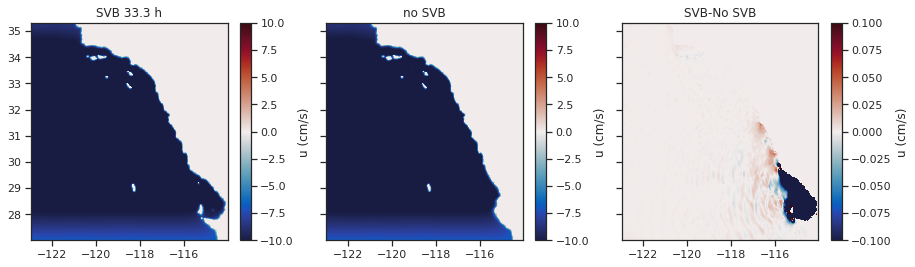

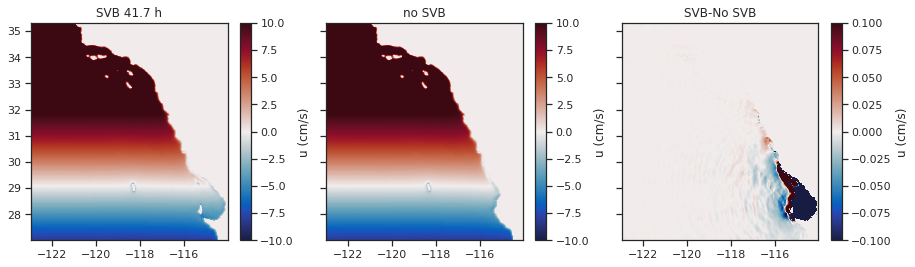

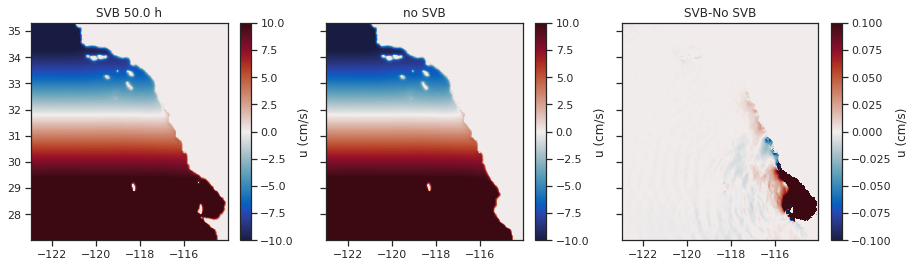

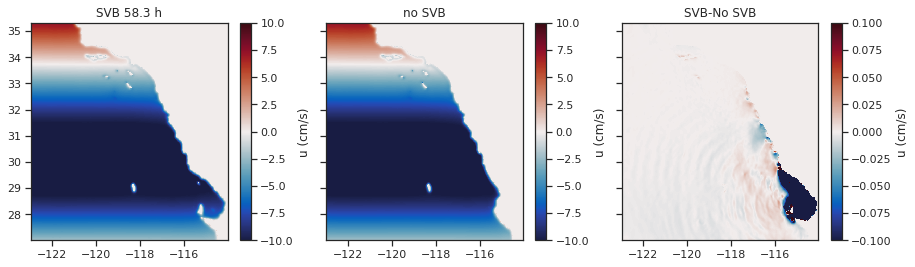

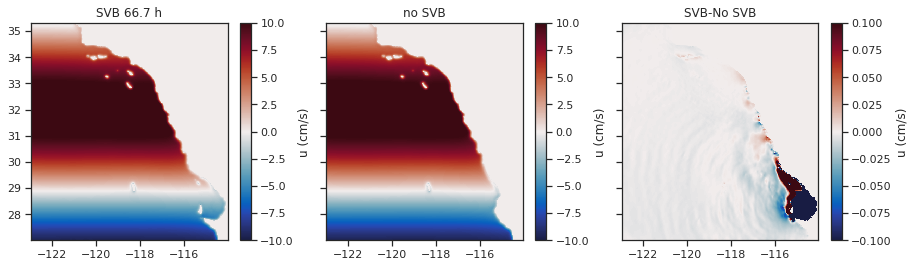

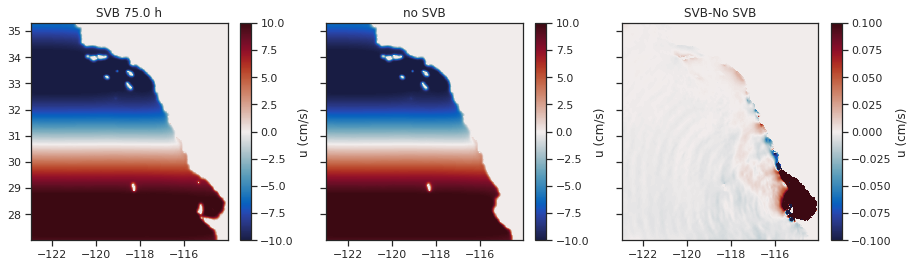

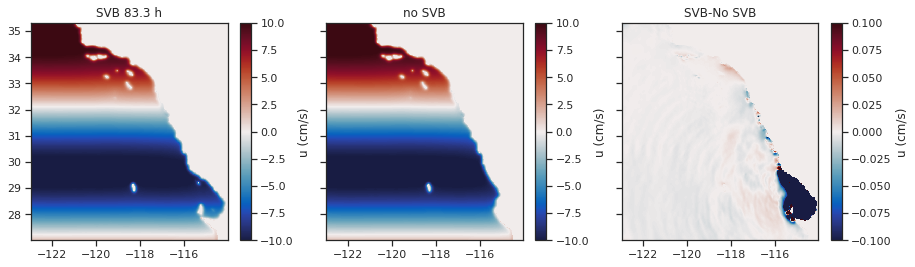

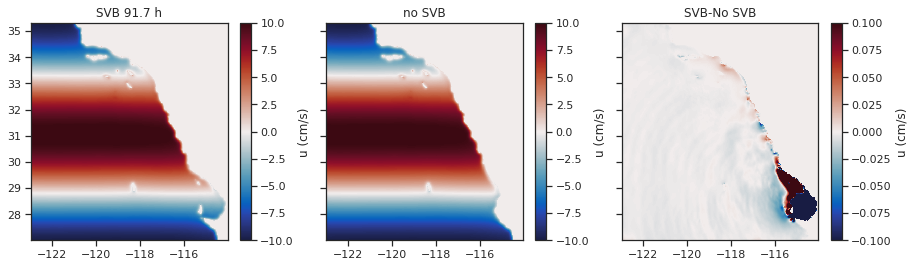

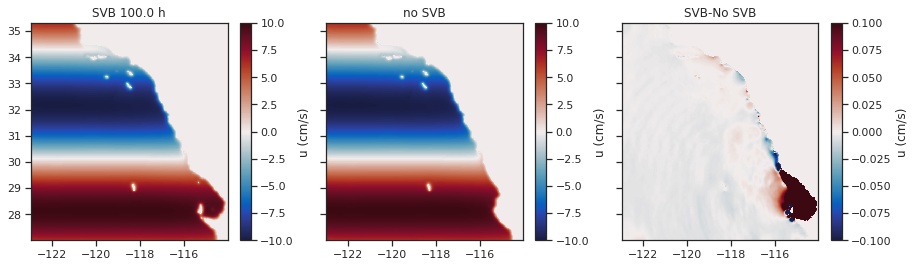

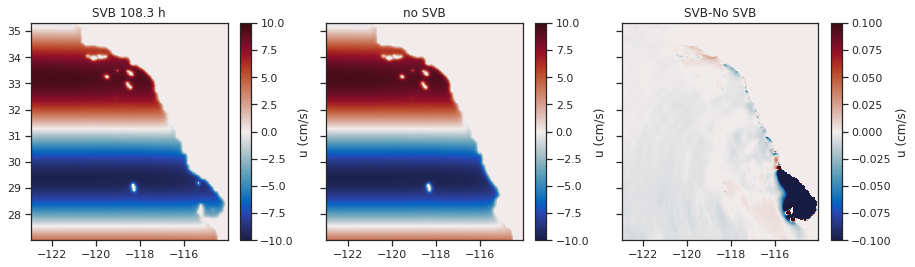

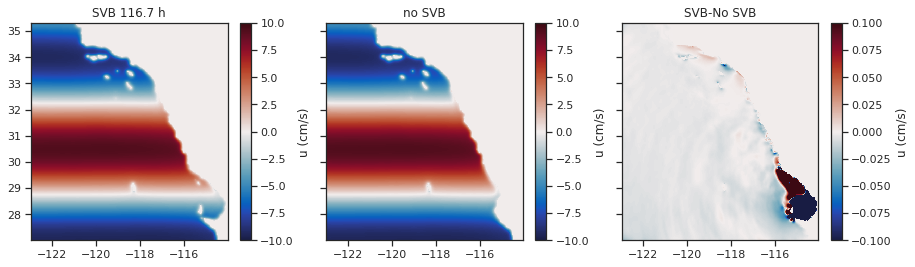

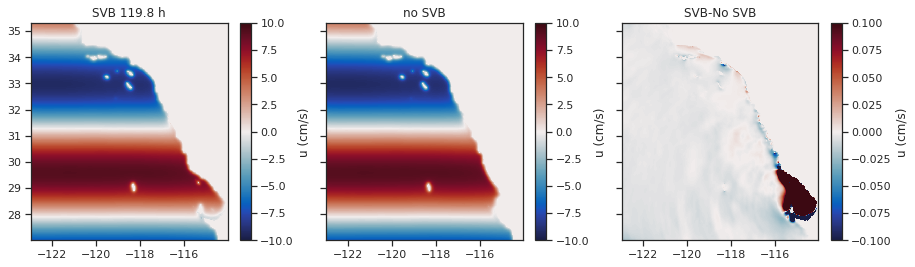

In [14]:
for ii in [0,50,100,150,200,250,300,350,400,450,500,550,600,650,700,719]:
    sns.set_style('ticks')
    sns.set_context('notebook')
    fig, (ax,ax1,ax2) = plt.subplots(1,3,figsize=(15,4), sharey=True)
    ax.set_facecolor('tan')
    pc = ax.pcolormesh(lon,lat,ds['UVEL'][ii,0,:,:]*100,
                      vmin=-10,vmax=10,cmap=cmo.cm.balance)
    cb = plt.colorbar(pc,ax=ax,label='u (cm/s)')
    ax.set_title('SVB %1.1f h' %(ii*600/3600))
    pc = ax1.pcolormesh(lon,lat,ds2['UVEL'][ii,0,:,:]*100,
                      vmin=-10,vmax=10,cmap=cmo.cm.balance)
    cb = plt.colorbar(pc,ax=ax1,label='u (cm/s)')
    ax1.set_title('no SVB')
    pc = ax2.pcolormesh(lon,lat,(ds['UVEL'][ii,0,:,:]-ds2['UVEL'][ii,0,:,:])*100,
                      vmin=-0.1,vmax=0.1,cmap=cmo.cm.balance)
    cb = plt.colorbar(pc,ax=ax2,label='u (cm/s)')
    ax2.set_title('SVB-No SVB')
    plt.show()

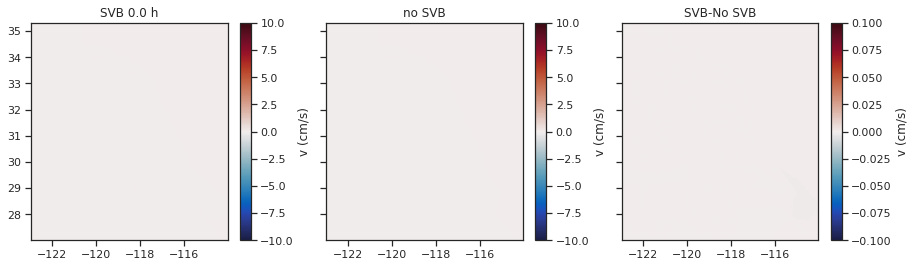

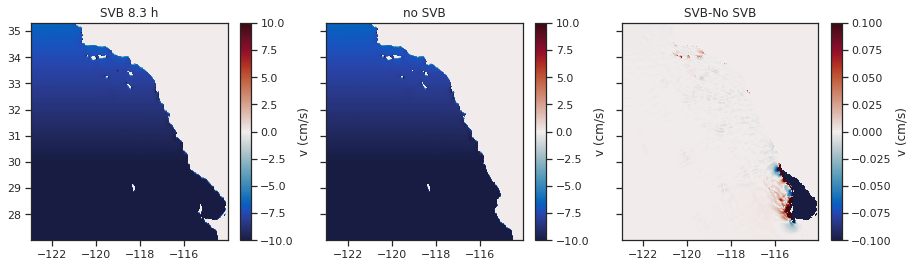

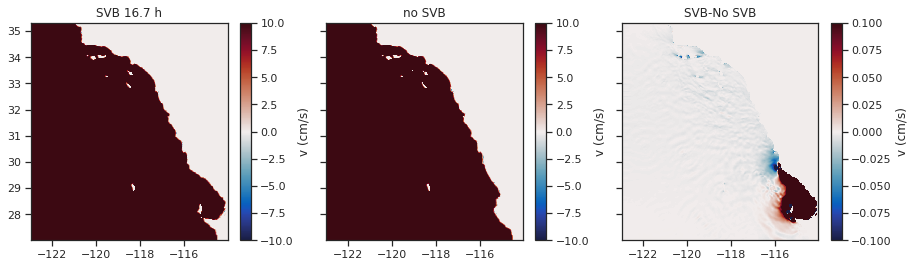

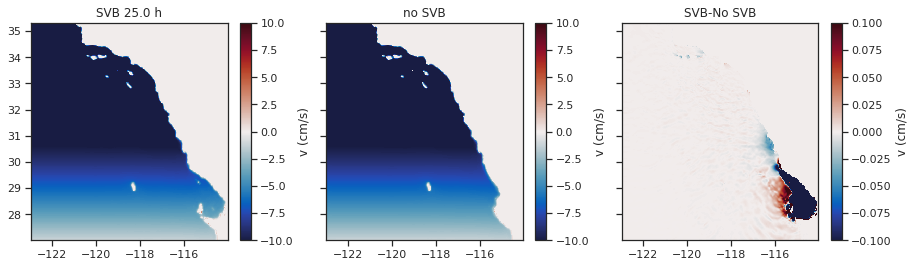

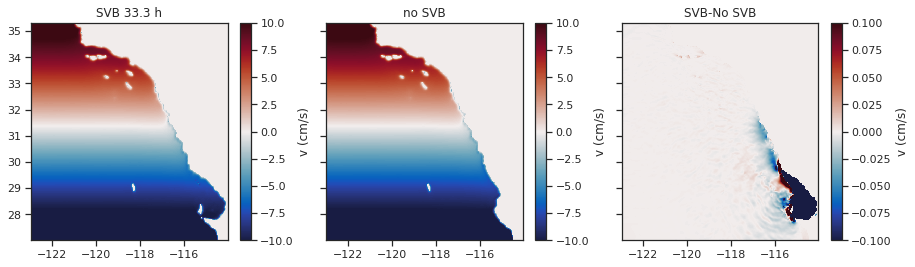

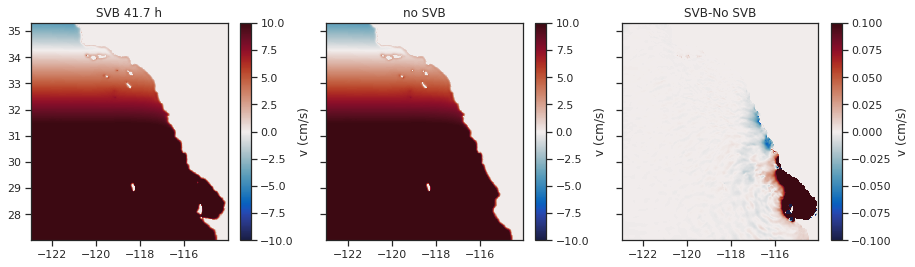

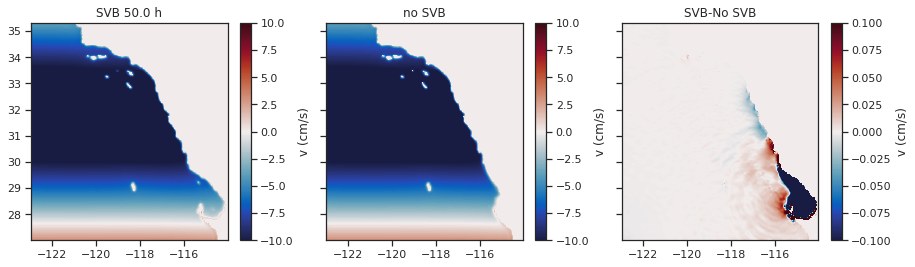

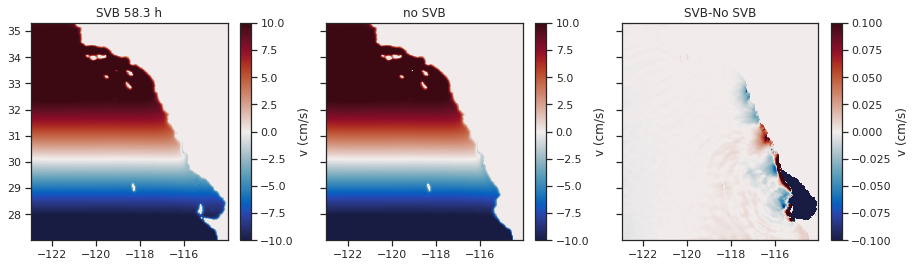

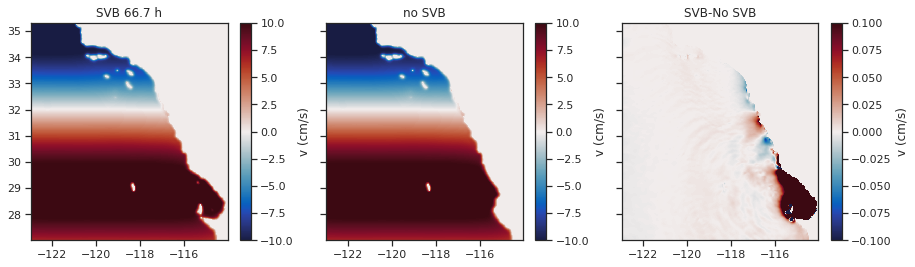

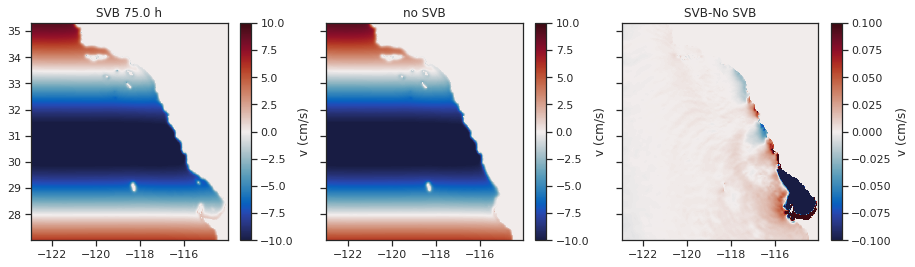

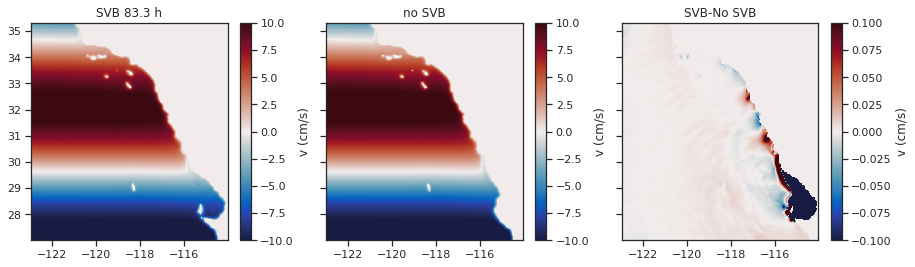

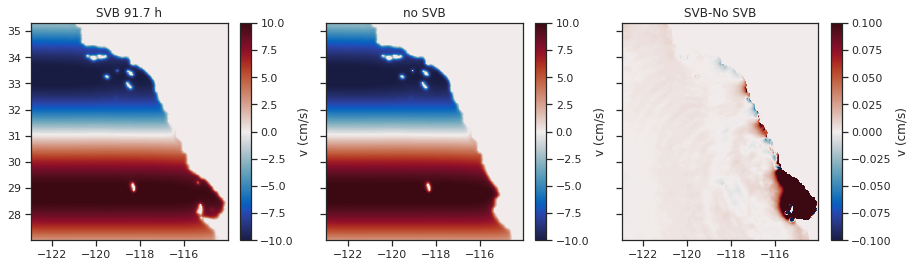

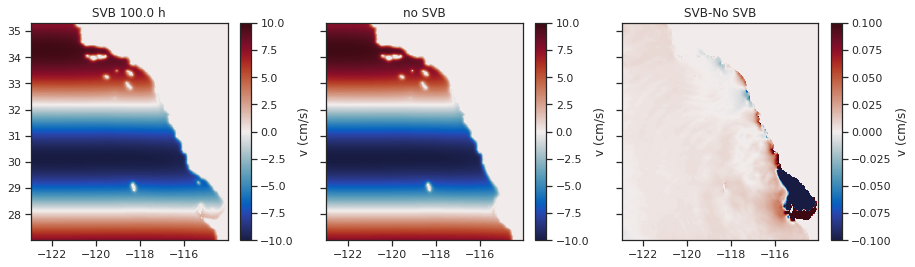

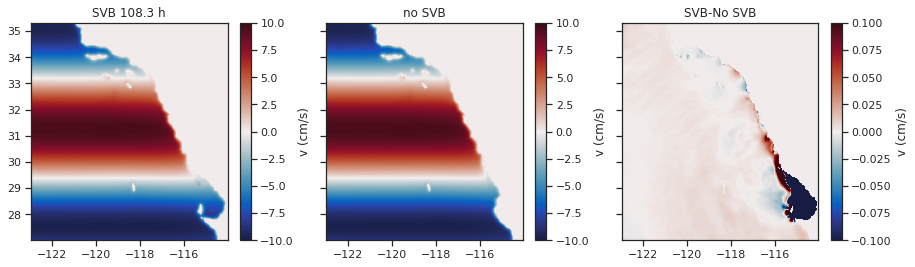

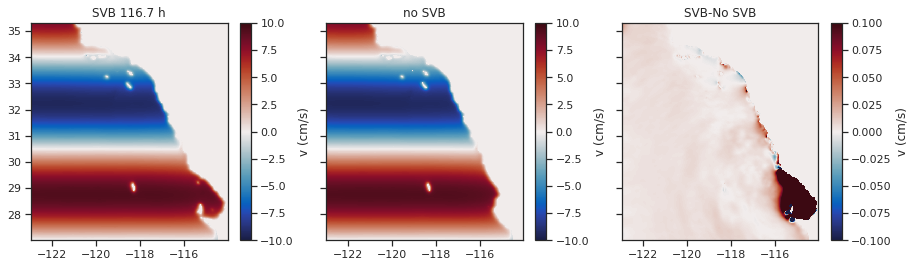

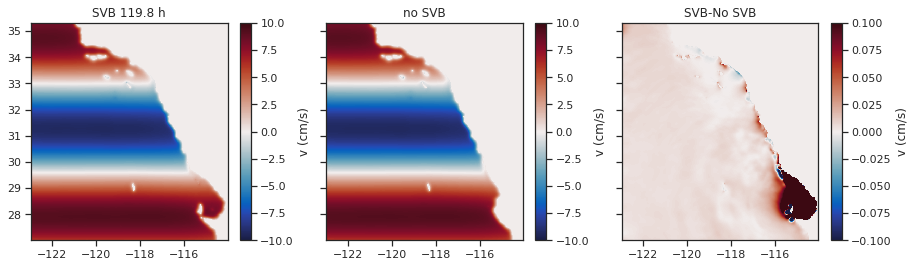

In [16]:
for ii in [0,50,100,150,200,250,300,350,400,450,500,550,600,650,700,719]:
    sns.set_style('ticks')
    sns.set_context('notebook')
    fig, (ax,ax1,ax2) = plt.subplots(1,3,figsize=(15,4), sharey=True)
    ax.set_facecolor('tan')
    pc = ax.pcolormesh(lon,lat,ds['VVEL'][ii,0,:,:]*100,
                      vmin=-10,vmax=10,cmap=cmo.cm.balance)
    cb = plt.colorbar(pc,ax=ax,label='v (cm/s)')
    ax.set_title('SVB %1.1f h' %(ii*600/3600))
    pc = ax1.pcolormesh(lon,lat,ds2['VVEL'][ii,0,:,:]*100,
                      vmin=-10,vmax=10,cmap=cmo.cm.balance)
    cb = plt.colorbar(pc,ax=ax1,label='v (cm/s)')
    ax1.set_title('no SVB')
    pc = ax2.pcolormesh(lon,lat,(ds['VVEL'][ii,0,:,:]-ds2['VVEL'][ii,0,:,:])*100,
                      vmin=-0.1,vmax=0.1,cmap=cmo.cm.balance)
    cb = plt.colorbar(pc,ax=ax2,label='v (cm/s)')
    ax2.set_title('SVB-No SVB')
    plt.show()

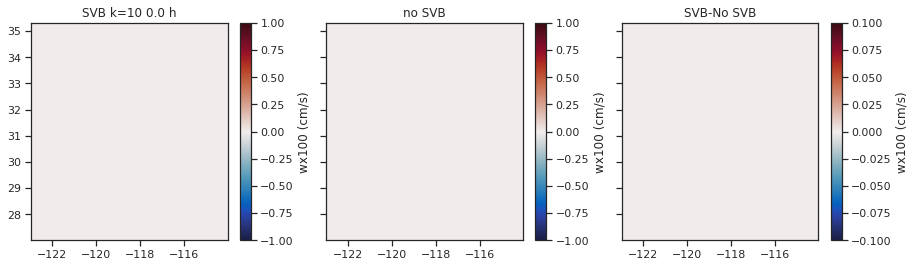

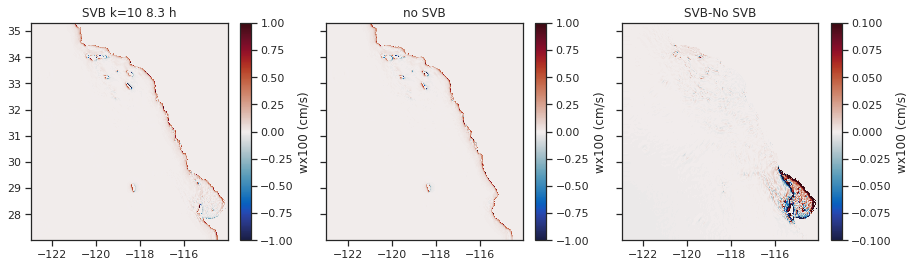

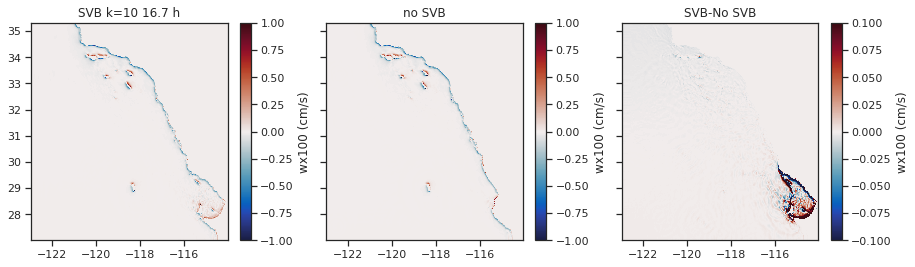

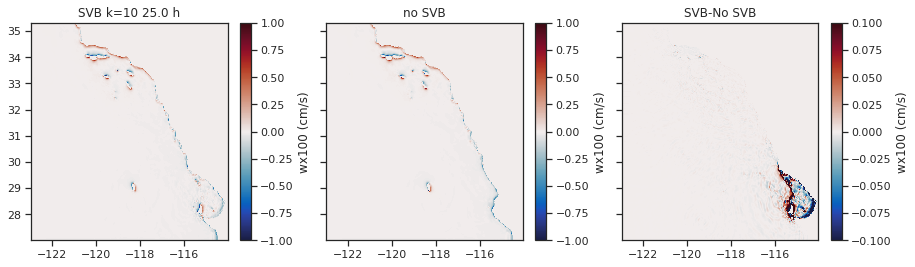

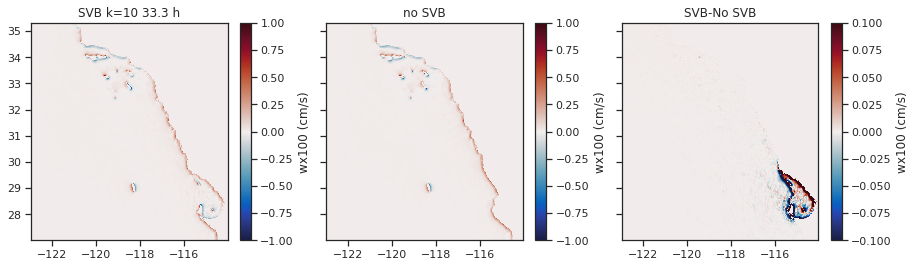

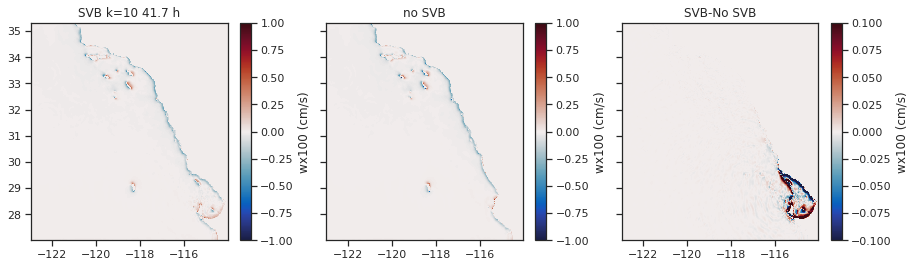

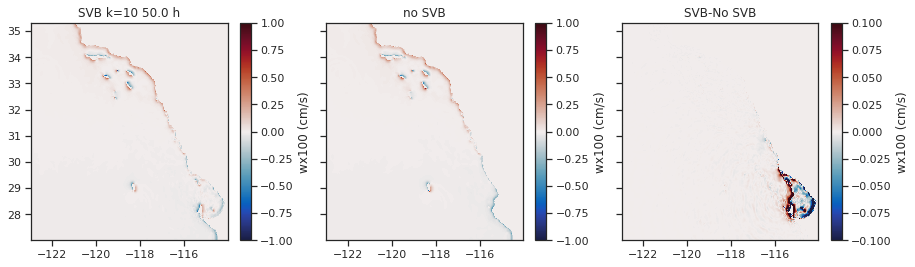

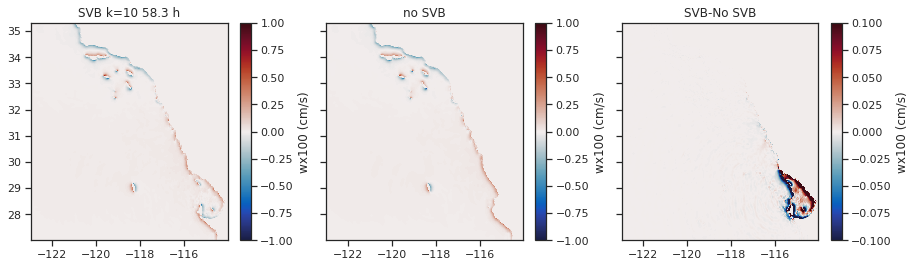

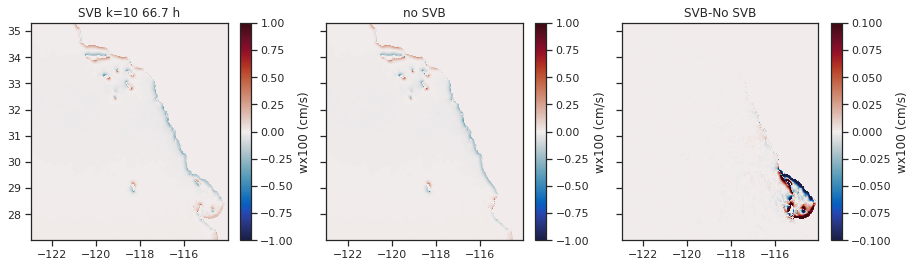

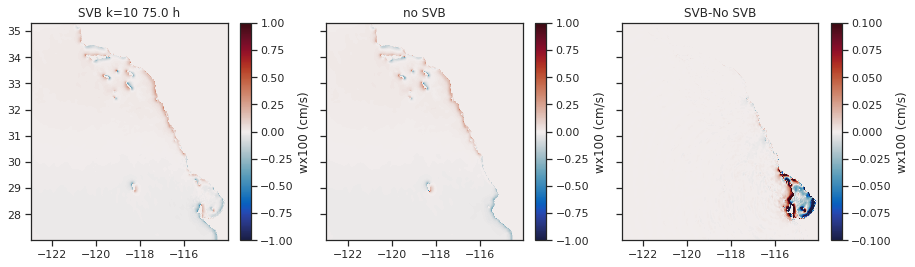

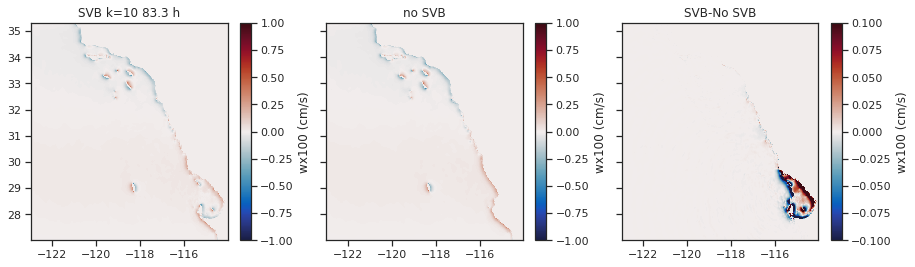

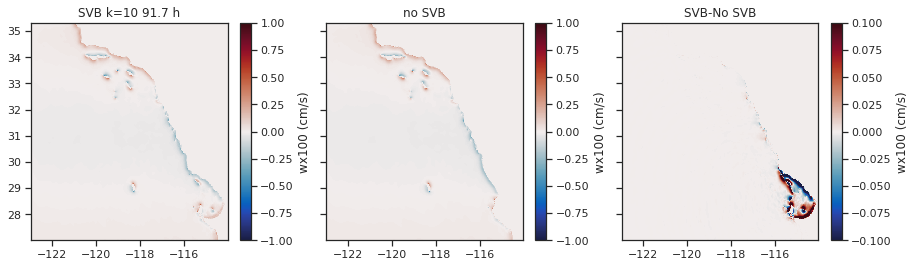

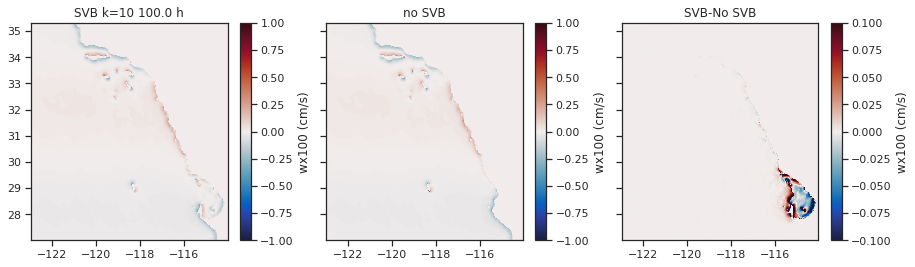

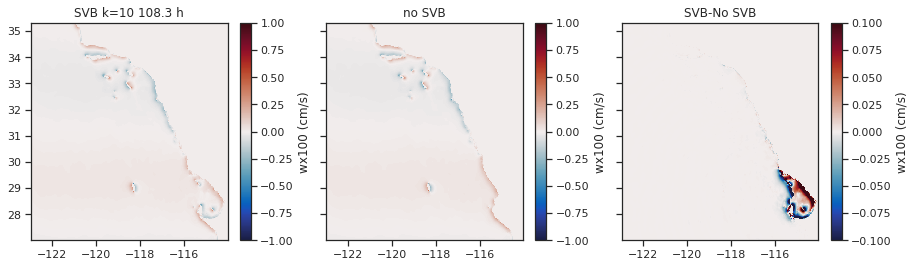

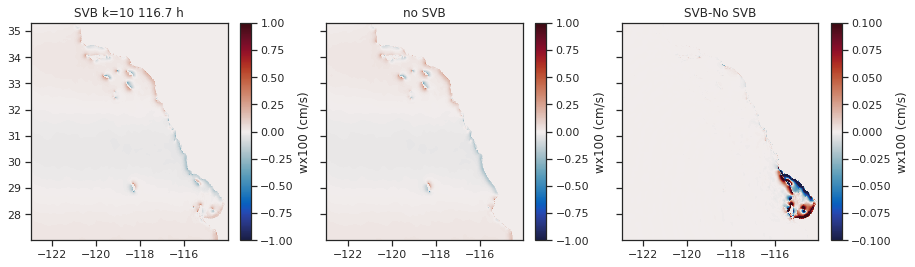

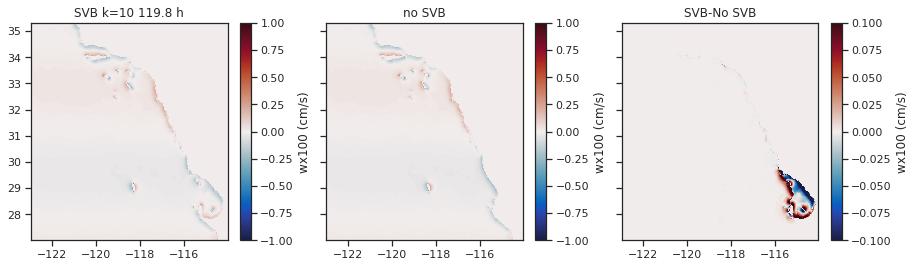

In [17]:
for ii in [0,50,100,150,200,250,300,350,400,450,500,550,600,650,700,719]:
    sns.set_style('ticks')
    sns.set_context('notebook')
    fig, (ax,ax1,ax2) = plt.subplots(1,3,figsize=(15,4), sharey=True)
    ax.set_facecolor('tan')
    pc = ax.pcolormesh(lon,lat,ds['WVEL'][ii,10,:,:]*10000,
                      vmin=-1,vmax=1,cmap=cmo.cm.balance)
    cb = plt.colorbar(pc,ax=ax,label='wx100 (cm/s)')
    ax.set_title('SVB k=10 %1.1f h' %(ii*600/3600))
    pc = ax1.pcolormesh(lon,lat,ds2['WVEL'][ii,10,:,:]*10000,
                      vmin=-1,vmax=1,cmap=cmo.cm.balance)
    cb = plt.colorbar(pc,ax=ax1,label='wx100 (cm/s)')
    ax1.set_title('no SVB')
    pc = ax2.pcolormesh(lon,lat,(ds['WVEL'][ii,10,:,:]-ds2['WVEL'][ii,10,:,:])*10000,
                      vmin=-0.1,vmax=0.1,cmap=cmo.cm.balance)
    cb = plt.colorbar(pc,ax=ax2,label='wx100 (cm/s)')
    ax2.set_title('SVB-No SVB')
    plt.show()